In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import glob

In [4]:
glob.glob(r"individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr/*csv")

['individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\AAL_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\AAPL_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\AAP_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\ABBV_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\ABC_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\ABT_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\ACN_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\ADBE_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\ADI_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\ADM_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\ADP_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\ADSK_data.csv',


In [5]:
company_list = [
    r"individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\AAL_data.csv",
    r"individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\AMZN_data.csv",
    r"individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\GOOGL_data.csv",
    r"individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\MSFT_data.csv"
]

In [6]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df],ignore_index = True) 

In [7]:
all_data.shape

(5036, 7)

In [8]:
tech_list = all_data["Name"].unique()

In [9]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [11]:
all_data["date"] = pd.to_datetime(all_data["date"])

In [12]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

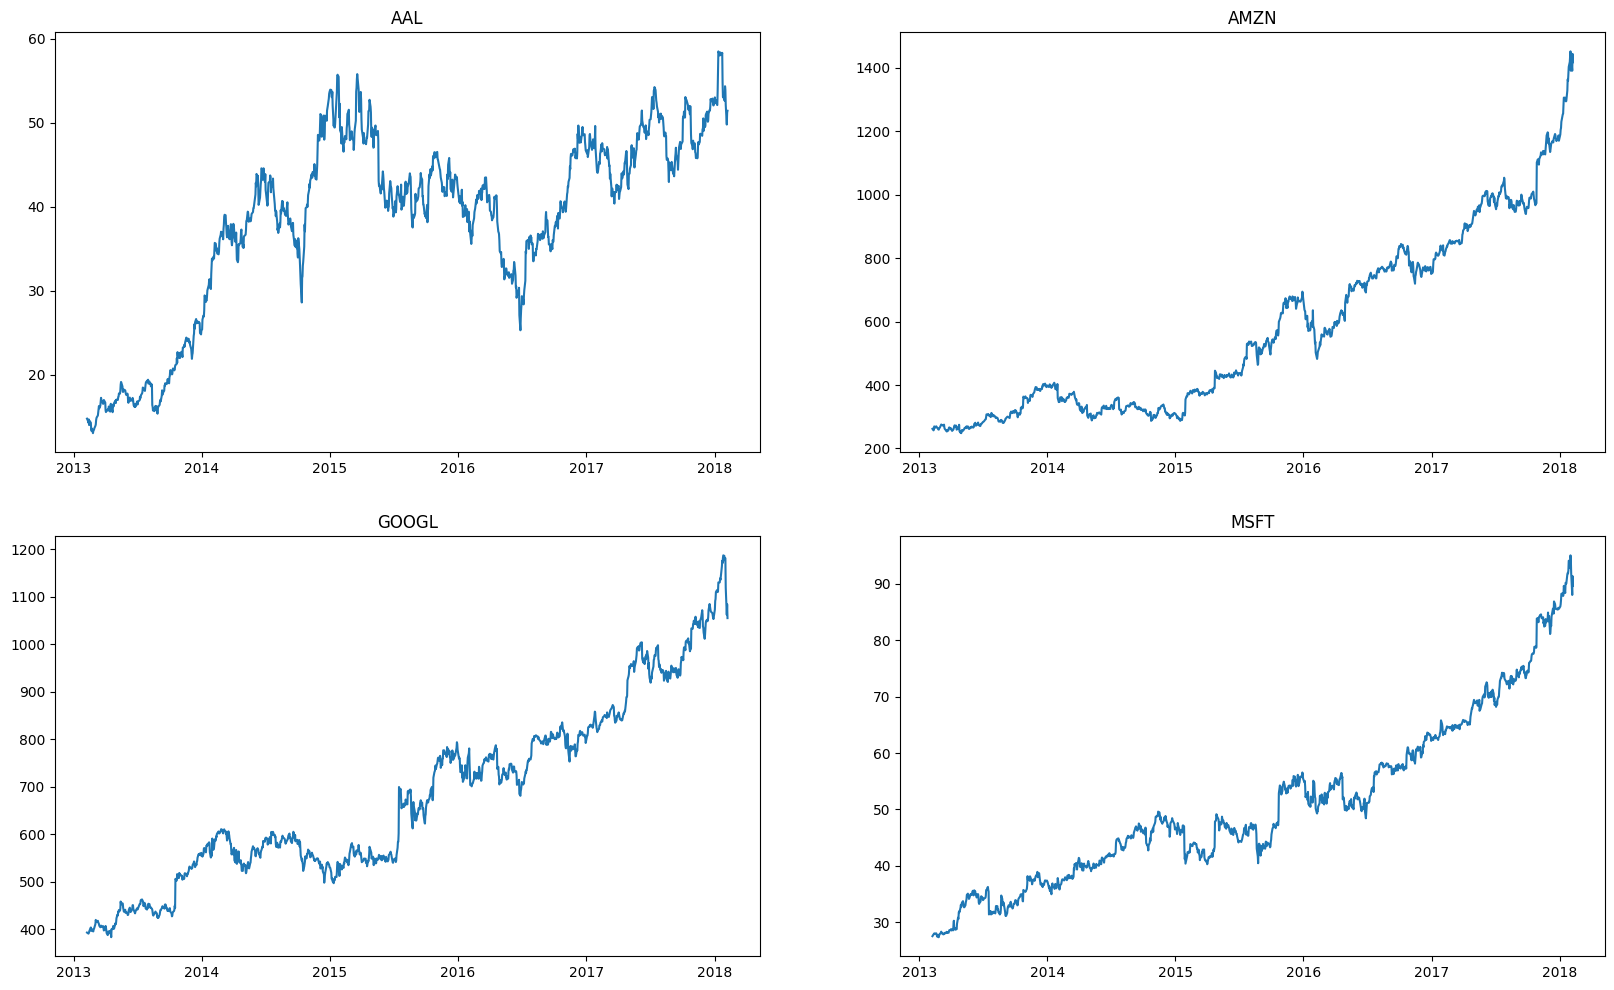

In [13]:
plt.figure(figsize = (20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = all_data["Name"]==company
    df = all_data[filter1]
    plt.plot(df["date"], df["close"])
    plt.title(company)

#3 what is a moving average


In [14]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [15]:
all_data["close"].rolling(window=10).mean().head(14)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9     14.116
10    13.943
11    13.823
12    13.737
13    13.614
Name: close, dtype: float64

In [16]:
new_data = all_data.copy()

In [17]:
ma_day = [10, 20, 50]

for ma in ma_day:
    new_data["close_"+str(ma)] = new_data["close"].rolling(ma).mean()

In [18]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
5029,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
5030,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
5031,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
5032,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
5033,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
5034,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
5035,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [19]:
new_data.set_index("date", inplace=True)

In [20]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

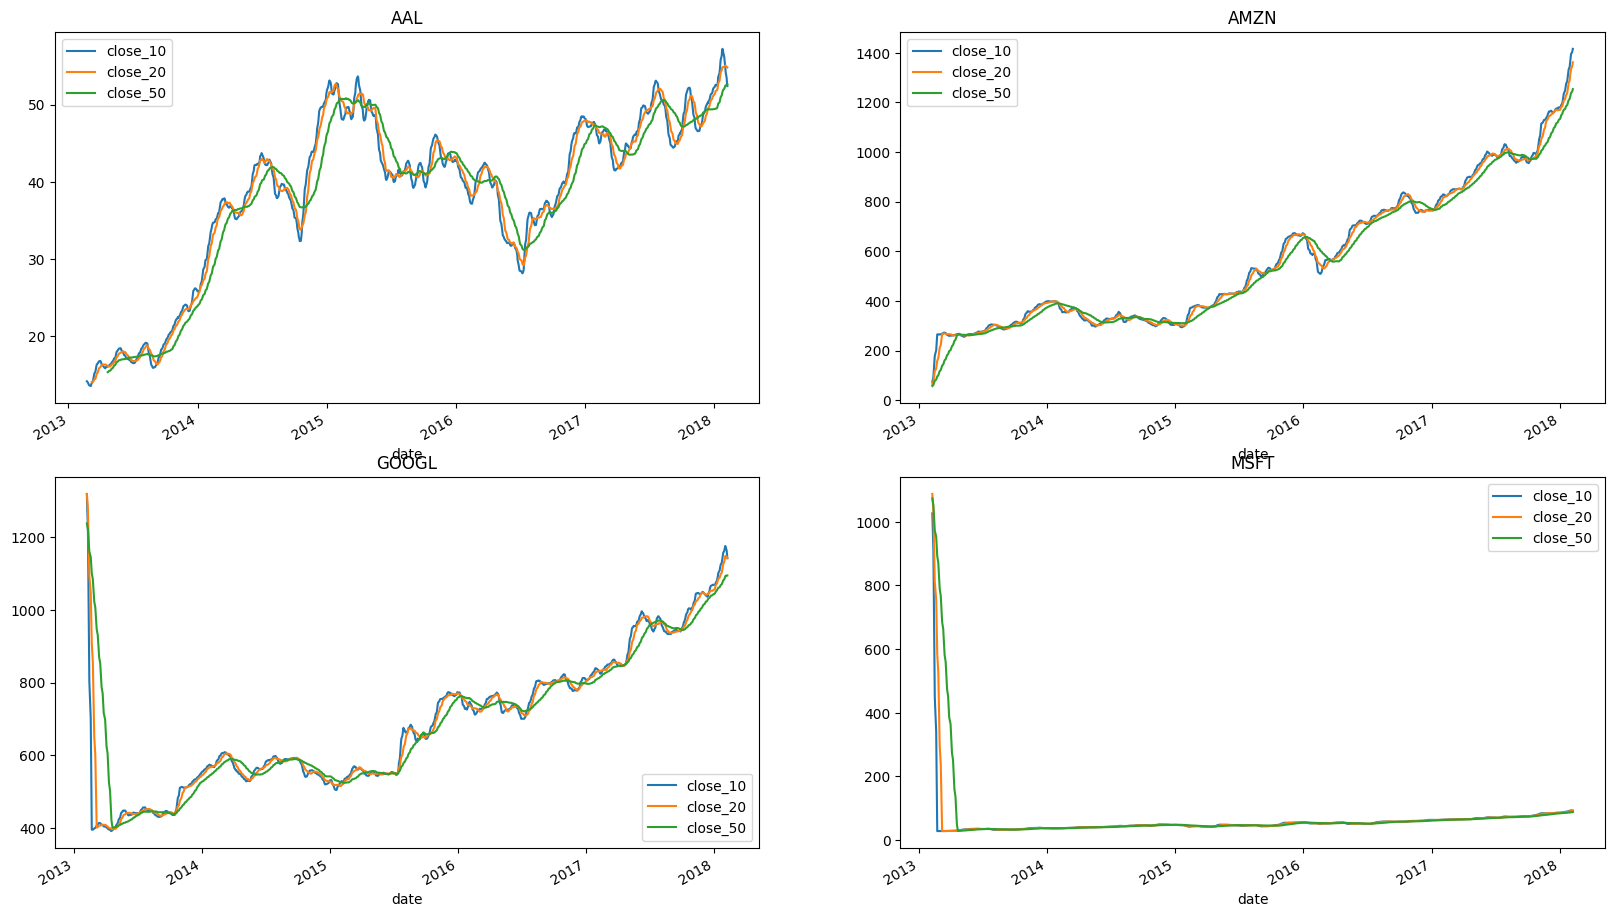

In [21]:
plt.figure(figsize = (20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = new_data["Name"]==company
    df =new_data[filter1]
    df[["close_10", "close_20", "close_50"]].plot(ax=plt.gca())
    plt.title(company)

#Observing closing price change in apple stock

In [22]:
company_list

['individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\\\AAL_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\\\AMZN_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\\\GOOGL_data.csv',
 'individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\\\\MSFT_data.csv']

In [29]:
apple = pd.read_csv(r"individual_stocks_5yr-20230720T111531Z-001/individual_stocks_5yr\AAPL_data.csv")

In [36]:
apple["Daily return in %"] = apple["close"].pct_change()*100

In [47]:
apple.tail(5)

,date,open,high,low,close,volume,Name,Daily return in %
1254,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,0.209043
1255,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,-4.339015
1256,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,-2.498442
1257,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,4.179181
1258,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,-2.140710


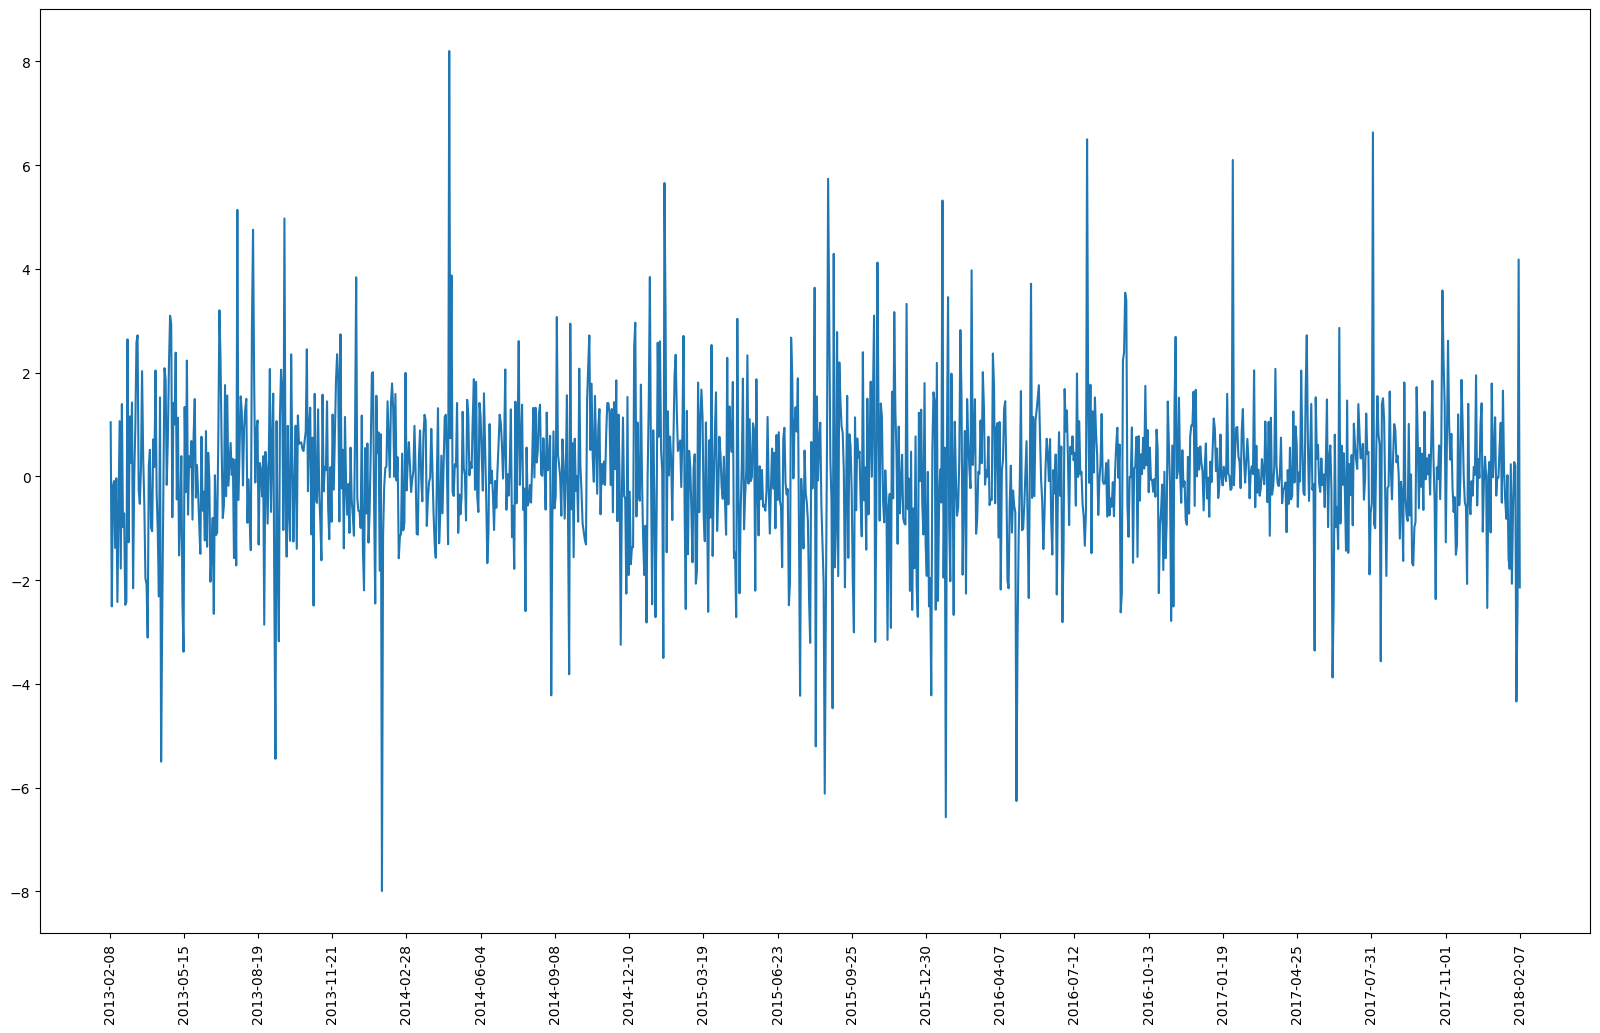

In [49]:
plt.figure(figsize = (20,12))
plt.plot(apple["date"], apple["Daily return in %"])
plt.xticks(rotation="vertical")
plt.xticks(np.linspace(0,1258,20));